퍼셉트론으로 복잡한 함수도 표현할 수 있지만, 가중치를 설정하는 작업(원하는 결과를 출력하도록)은 여전히 사람이 수동으로 해야 한다.  
**신경망**이 이를 해결해준다.  
가중치 매개변수의 적절한 값을 **데이터로부터 자동으로 학습**하는 능력이 있다.

## 1. 퍼셉트론에서 신경망으로
### 1.1 신경망의 예
<img src="https://poddeeplearning.readthedocs.io/ko/latest/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%20%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%20%EB%94%A5%EB%9F%AC%EB%8B%9D/2_perceptron_pulpan92_image/image6.png">

- 크게 입력층, 은닉층, 출력층으로 나뉨.  
- 은닉층
    - 입력층, 출력층과 달리 사람 눈에는 보이지 않는다.(은닉)
- 왼쪽 입력층부터 차례로 0층, 1층, 2층이라 하자.  
    - 모두 3층이지만, 가중치를 갖는 층은 2개뿐이기 때문에 '2층 신경망'이라고 한다.

### 1.2 퍼셉트론 복습
<img src="http://mblogthumb1.phinf.naver.net/MjAxNzA4MDhfMTAx/MDAxNTAyMjAzNjYxNzc5.sK4JqoJM1DLAWyR5fSFPWQaPLPa6HzjT_8fxxupwplgg.3sX5XGhfkEaJ9ZEkAUkeltjSlK4K2Yds-q_WxKf_xpQg.PNG.infoefficien/image.png?type=w800">

$y=
\begin{cases}
0, & \mbox{if }\mbox{($b + w_1x_1 + w_2x_2) \le 0$} \\
1, & \mbox{if }\mbox{($b + w_1x_1 + w_2x_2) > 0$}
\end{cases}
$

네트워크에 편향 b가 보이도록 다시 그려보자.  
<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMTIy/MDAxNTAwOTQ2MDkzNDQy.bC26V7_DDijjseFjR5VQRm4IZFs47xQAMRT5dQ_o3jog.ixRyhVassnd7SMgwVMXTMz5FCh4noygfD8A95e4PxQMg.PNG.cjswo9207/fig_3-3.png?type=w2">

- 편향(b): 뉴런이 얼마나 쉽게 활성화되느냐를 제어.  
- 가중치($w_1, w_2$): 각 신호의 영향력을 제어

x1, x2, 1 이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달.  
다음 뉴런에서는 이들 신호의 값을 더하여, 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력.  
조건 분기의 동작을 하나의 함수 h(x)로 하여 다시 써보면,  
$y = h(b + w_1x_1+w_2x_2)$  
$h(x) \ =
\begin{cases}
0 & \mbox{($x \le 0$)} \\
1 & \mbox{(x > 0)}
\end{cases}
$

입력 신호의 총합이 h(x)라는 함수를 거쳐 변환되어, 그 변환된 값이 y의 출력이 된다.

### 1.3 활성화 함수의 등장
h(x)처럼 **입력 신호의 총합을 출력 신호로 변환하는 함수**를 일반적으로 **활성화 함수(Activation Function)**라 한다.  
활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.  

- $y = h(b + w_1x_1+w_2x_2)$ 식은 2단계로 처리.
    1. $a = b + w_1x_1 + w_2x_2$
    2. $y = h(a)$

가중치가 달린 입력 신호와 편향의 총합을 계산하고 이를 a라 한다.  
그리고 a를 함수 h()에 넣어 y를 출력.  
처리과정을 더 자세히 나타내면,  
<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfNTMg/MDAxNTAwOTUwMDA1MzI2.GmKoXK7lmbxzOXsqtT1Eke6-BPtEkAa7x7Z0ZWKCvSog.YLcfCMXqdqW3_Qr6n_z-X8Qr9RRgmf6miznfKiy30PMg.PNG.cjswo9207/fig_3-4.png?type=w2">

신경망의 동작을 더 명확히 드러내기 위해 이처럼 활성화 처리 과정을 명시하기도 한다.

## 2. 활성화 함수
활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 **계단 함수(Step Function)**라 한다.  
즉 퍼셉트론에서는 활성화 함수로 계단함수를 이용한다고 할 수 있다.  
계단 함수 이외의 함수를 사용하면??

### 2.1 시그모이드 함수(Sigmoid Function)
시그모이드 함수는 신경망에서 자주 이용되는 활성화 함수이다.

$h(x) = {1 \over {1 \ + \ exp(-x)}}$

### 2.2 계단 함수 구현하기

In [1]:
def step_function(x):
    return x > 0 and 1 or 0

실수만 받아들인다... 넘파이 배열도 지원하도록 하자.

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

numpy의 트릭을 이용.

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x > 0
y

array([False,  True,  True], dtype=bool)

y = y.astype(np.int)
y

numpy 배열 자료형 변활할 때는 astype()메서드 이용. 원하는 자료형을 인수로 지정.

### 2.3 계단 함수의 그래프
정의한 계단 함수를 그려보자

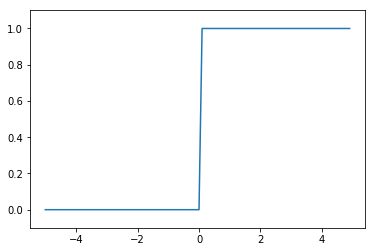

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 2.4 시그모이드 함수 구현

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

numpy 브로드캐스트를 통해 계산됨..

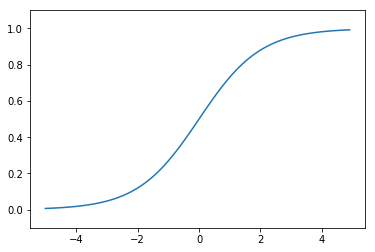

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 2.5 시그모이드 함수와 계단 함수 비교
- 시그모이드 함수
    - 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다.  
    - 실수 값을 돌려준다.
- 계단 함수
    - 0을 경계로 출력이 갑자기 바뀌어 버린다.  
    - 0과 1 중 하나의 값을 돌려준다.
- 공통점
    - 입력이 작을 때의 출력은 0에 가깝고 입력이 커지면 1에 가까워지는 구조.
    - 입력이 아무리 작거나 커도 출력은 0에서 1 사이.


### 2.6 비선형 함수
계단함수와 시그모이드 함수는 **비선형 함수**라는 공통점도 있다.  
- 선형함수: 입력의 상수배 만큼 변하는 함수.. 1개의 직선으로 이루어진 관계
- 비선형 함수: 선형이 아닌 함수. 직선 1개로는 그릴 수 없다.

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.  
선형 함수를 이용하면 **신경망의 층을 깊게 하는 의미**가 없어짐.  

선형 함수는 아무리 층을 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다.

### 2.7 ReLU(Rectified Linear Unit)함수
입력이 0을 넘으면 그 입력을 그대로 출력, 0 이하이면 0을 출력하는 함수

$h(x) =
\begin {cases}
x & \mbox {$(x \ > \ 0)$}\\
0 & \mbox {$(x \ \le \ 0)$}
\end {cases}
$

In [9]:
def relu(x):
    return np.maximum(0, x)

## 3. 다차원 배열의 계산
넘파이 다차원 배열을 사용한 계산을 통해 신경망을 효율적으로 구현할 수 있다.

### 3.1 다차원 배열

In [10]:
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [11]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 3.2 행렬의 내적(행렬 곱)

In [12]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


두 행렬의 내적은 넘파이 함수 np.dot()으로 계산. shape에 주의.

### 3.3 신경망의 내적
넘파이 행렬을 써서 신경망을 구현해보자. 편향과 활성화 함수를 생략하고 가중치만..  
<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMjA5/MDAxNTAwOTUzMTEzMjMw.fRbfdjKns-OpGlfZTJnafm5kSAp4v0DNCF9L4Cw5xm8g.MtSBccTVjDsrYjhJ5X-Abq_-Dqj8QGJRz5cARaFSU_Qg.PNG.cjswo9207/fig_3-14.png?type=w2">

In [13]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 4. 3층 신경망 구현하기
<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMTMy/MDAxNTAwOTUzNDEyNTky.gBbnrnHVEFvWxci6NVMH19Jn3S1OVShk7kbwK1tAUcQg.O2A3dd_x-l6GbInrPKTqhv2e4pf7n7H-p8QYKHcyrCYg.PNG.cjswo9207/fig_3-15.png?type=w2">

입력층 2개, 첫 번째 은닉층 3개, 두 번째 은닉층 2개, 출력층 2개의 뉴런으로 구성.

### 4.1 표기법 설명
<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMTMy/MDAxNTAwOTUzNDUyNDYw.21mnU_78KeAq2uLKFd-4axjt_9E6TF9mOkA8H9tvjxMg.qfxzYjTJpagOg972bkq6Y-4dgCFOULYtrbt95Cl-rkgg.PNG.cjswo9207/fig_3-16.png?type=w2">

입력층의 뉴런 $x_2$에서 다음 층의 뉴런 $a_1^{(1)}$으로 향하는 선 위에 가중치를 표시

가중치와 은닉층 뉴런의 오른쪽 위에는 $^{(1)}$이 붙어있다. 이는 1층의 가중치, 1층의 뉴런임을 뜻하는 번호.  
또, 가중치의 오른쪽 아래 두 숫자는 차례로 다음 층 뉴런과 앞 층 뉴런의 인덱스 번호.

### 4.2 각 층의 신호 전달 구현하기
<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMTcy/MDAxNTAwOTUzNTk1Mzk3.fIWAg9zTwgThpPEI9gXKuECLBvYJj-R-llYeQH7FzOgg.ZUS9ssvAu9rTBqKtMRCQuSO6IJBtu5IB-lBjYsq37EEg.PNG.cjswo9207/fig_3-17.png?type=w2">
입력층에서 1층의 첫 번째 뉴런으로 가는 신호

$a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}$

행렬의 내적을 이용하면 1층의 '가중치 부분'을 간소화할 수 있다.  
$\mathbf{A}^{(1)} = \mathbf{XW}^{(1)} + \mathbf{B}^{(1)}$

각 행렬은 다음과 같다.  
$\mathbf{A}^{(1)} = \left(a_1^{(1)} a_2^{(1)} a_3^{(1)} \right)$    
  
$\mathbf{X}^{(1)} = \left(x_1 x_2 \right)$   
  
$\mathbf{B}^{(1)} = \left(b_1^{(1)} b_2^{(1)} b_3^{(1)} \right)$  

$\mathbf{W}^{(1)} = 
\begin{pmatrix} w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{pmatrix}
$

In [14]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[ 0.3  0.7  1.1]


<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfNzIg/MDAxNTAwOTUzOTUxODE2.EO86qv14LMe0XD8RbjbOWPg9wmlOUsVlyRkY74pkF3Qg.alITMIEqLVHwur0xsFk-Zt0S5GToWO7Ybbq_YmKWR0gg.PNG.cjswo9207/fig_3-18.png?type=w2"> 활성화 함수의 처리.

은닉층에서의 가중치 합(가중 신호와 편향의 총합)을 a로 표기하고 활성화 함수 h()로 변환된 신호를 z로 표기.

In [15]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMTIg/MDAxNTAwOTUzOTUyMDgy.M55db-L4bz2t1Tkk2HnpnIDb5wtoEfEvIdY21Rwmhbcg.3QF9zwazjS7Lqb6kf1QdqKagn0X18XXckREP9s26yHMg.PNG.cjswo9207/fig_3-19.png?type=w2">

1층에서 2층으로 가는 과정.

In [16]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[ 0.51615984  1.21402696]
[ 0.62624937  0.7710107 ]


<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMTcx/MDAxNTAwOTU0MDExMjU4.lnCl9ijPTaa1DgRrLGcu6NJTTSlR-5kTu5vc68_qBTEg.7EjtnZ4hLzShr_KZj2N6ODjNnbTc7f3JEtxLMUdSJckg.PNG.cjswo9207/fig_3-20.png?type=w2">

2층에서 출력층으로 신호 전달. 활성화 함수만 추가.

In [17]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(A3)
print(Y)

[ 0.31682708  0.69627909]
[ 0.31682708  0.69627909]


출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.  
회귀에는 항등함수, 2클래스 분류에는 시그모이드, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적.

### 4.3 구현 정리

In [18]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)   

[ 0.31682708  0.69627909]


forward => 신호가 순방향(입력에서 출력 방향)으로 전달됨(순전파)을 알리기 위함.  
신경망 학습을 다룰 때는 역방향(backward, 출력에서 입력 방향)처리까지..  

## 5. 출력층 설계하기
신경망은 분류와 회귀 모두에 이용 가능.  
어떤 문제냐에 따라 사용하는 활성화 함수가 달라진다.  
일반적으로 회귀에는 항등 함수, 분류에는 소프트맥스 함수를 사용.

### 5.1 항등 함수와 소프트맥스 함수 구현
- 항등 함수: 입력을 그대로 출력
<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMjg1/MDAxNTAwOTU0OTY5NTU4.ZtP7ZZ5XyOXByRFhdu8b2ZLY5RrI2HUB6f_0RJ3iHAAg.8KVM58u90RC0zVqLqx4Rb7h7QToyAJGwnufx9iQ-RBog.PNG.cjswo9207/fig_3-21.png?type=w2">
- 소프트맥스 함수(Softmax Function)
    - $y_k = {exp(a_k) \over \sum_{i=1}^n exp(a_i)}$
    - n은 출력층의 뉴런 수, $y_k$는 그중 k번째 출력임을 뜻함, 
    - 분자는 입력신호 $a_k$의 지수함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성.
<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfNDIg/MDAxNTAwOTU1MDM1MzAw.sJCaYo90ZC5c7zuGAOcRZQ3Kn0mSqpcQmAAIHBRHATYg.Ebzo8fl7HX1nSNcNU52Dmu9ROy8cSdtt1ixKicUpbPAg.PNG.cjswo9207/fig_3-22.png?type=w2">

In [19]:
a = np.array([0.3, 2.8, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  16.44464677  54.59815003]
72.3926556118
[ 0.01864635  0.22715905  0.7541946 ]


In [20]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 5.2 소프트맥스 함수 구현 시 주의점
위 코드는 식을 제대로 표현하고 있지만 오버플로 문제가 있다. 큰 값끼리 나눗셈을 하면 결과가 불안정해진다.  
원래 식에 C라는 임의의 정수를 분자 분모 양쪽에 곱하고 exp 안으로 옮겨 locC로 만들어 C'라는 새로운 기호로 바꾼다.  
즉 소프트맥스의 지수함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않는다.  
오버플로를 막을 목적으로 입력 신호 중 최댓값을 빼주어 올바르게 계산할 수 있다.

In [21]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a - c)
print(np.exp(a - c) / np.sum(np.exp(a - c)))

[ nan  nan  nan]
[  0 -10 -20]
[  9.99954600e-01   4.53978686e-05   2.06106005e-09]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [22]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 5.3 소프트맥스 함수의 특징

In [23]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[ 0.01821127  0.24519181  0.73659691]
1.0


소프트맥스 함수의 출력은 0에서 1.0 사이의 실수, 출력의 총합은 1.  
이 성질 덕분에 **소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.**  

- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. y = exp(x)가 단조 증가 함수이기 때문.
- 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다.
    - 분류할때는 소프트맥스 함수를 생략해도 된다.  계산 비용 낭비를 줄이고자..
    - 기계학습 문제 풀이는 학습과 추론 두 단계.
        - 추론 단계에서는 출력층의 소프트맥스 함수를 생략.
        - 학습 단계에서는 출력층에서 소프트맥스 함수를 사용

### 5.4 출력층의 뉴런 수 정하기
출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 함.  
- 분류: 분류하고 싶은 클래스 수로 설정

## 6. 손글씨 숫자 인식
학습된 매개변수를 사용하여 학습 과정은 생략, 추론 과정만 구현(Forward Propagation)

### 6.1 MNIST 데이터셋
- 0~9까지 숫자 이미지로 구성.  
- 훈련 이미지 60,000장, 시험 이미지 10,000장.  
- 28 x 28 크기 1채널 이미지. 각 픽셀은 0~255값.

In [24]:
import sys, os
# sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


normalize: 입력 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지를 정함.  
flatten은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 결정.  
one_hot_label은 레이블을 원-핫 인코딩 형태로 저장할지를 결정.  

```
파이썬에는 pickle(피클)이라는 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능이 있다.  
저장해둔 pickle 파일을 로드하면 실행 당시의 객체를 즉시 복원할 수 있다.  
pickle 덕분에 MNIST데이터를 순식간에 준비할 수 있다.
```

In [25]:
import sys, os
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)


img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


flatten=True로 설정해 읽어 들인 이미지는 1차원 넘파이 배열로 저장.  
그래서 이미지를 표시할 때는 원래 형상인 28x28 크기로 다시 변형해야 한다.  
reshape()메서드에 원하는 형상을 인수로 지정하면 넘파이 배열의 형상을 바꿀 수 있다.  
또한 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야 하며, 이 변환은 Image.fromarray()가 수행한다.  

### 6.2 신경망의 추론 처리
MNIST 데이터셋을 가지고 추론을 수행하는 신경망 구현.  
입력층 뉴런 784개, 출력층 뉴런 10개로 구성.  
이미지 크기가 28x28=784이고, 문제가 0~9의 숫자를 분류하는 문제이기 때문.  
은닉층은 총 두 개, 첫 번째 은닉층에서 50개 뉴런, 두 번째 은닉층에서 100개의 뉴런 배치(임의의 값)

In [30]:
import pickle

In [31]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [32]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)    # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


- MNIST 데이터셋을 얻고 네트워크 생성. 
- for문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 predict() 함수로 분류.  
- predict()함수는 각 레이블의 확률을 넘파이 배열로 반환.  
- np.argmax()함수로 이 배열에서 가장 값이 큰 워소의 인덱스를 구한다.
- 이 예측과 정답 레이블을 비교하여 맞힌 숫자를 세고, 이를 전체 이미지 숫자로 나눠 정확도를 구한다.  

load_mnist함수의 인수인 normalize를 True로 설정했는데 이처럼 데이터를 특정 범위로 변환하는 처리를 **정규화**라 하고,  
신경망의 입력 데이터에 특정 변환을 가하는 것을 **전처리**라 한다.  
전처리를 통해 식별 능력을 개선하고 학습 속도를 높이는 등의 사례가 많이 있다.  
앞의 예에서는 각 픽셀의 값을 255로 나누는 단순한 정규화를 수행했지만, 현업에서는 데이터 전체의 분포를 고려해 전처리하는 경우가 많다.  
예를 들어 데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동하거나 데이터의 확산 범위를 제한하는 정규화를 수행한다.  
그 외에도 전체 데이터를 균일하게 분포시키는 데이터 **백색화(Whitening)**등도 있다.

### 6.3 배치 처리
앞서 구현한 신경망 각 층의 가중치 형상을 출력해보자.

In [33]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


다차원 배열의 대응하는 차원의 원소 수가 일치하고 있다.  
그리고 최종 결과로는 원소가 10개인 1차원 배열 y가 출력된다.  
<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMTIx/MDAxNTAwOTU5MTU4NTYy.AC4KqAHyayYWYTJ2c4SdWffmC6NAb-jmEHuUdznDgTUg.8dNZ7mkCyosol68LO_WuXTZHzDh7JeS9m-TR-m06Khwg.PNG.cjswo9207/fig_3-26.png?type=w2">
원소 784개로 구성된 1차원 배열이 입력되어 마지막에 원소가 10개인 1차원 배열이 출력되는 흐름. 이미지 1장만 입력했을 때.
<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMjg4/MDAxNTAwOTU5MTU4ODE0.ebYRvsGqYBamCO1R1gP7mhNATFTLydxfUBp9OWyIX8Ug.asXxa49YNNhFtNypPtGfsh3tnnC6Z7oKmWrCeXTrSSEg.PNG.cjswo9207/fig_3-27.png?type=w2">
이미지 100개를 묶어 predict()함수에 한 번에 넘기는 경우.  
100장 분량 입력 데이터의 결과가 한 번에 출력된다.  

이처럼 하나로 묶은 입력 데이터를 **배치(batch)**라 한다.  
배치 처리는 컴퓨터로 계산할 때 큰 이점을 준다. 이미지 한 장당 처리 시간을 대폭 줄여줌.  
1. 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있기 때문.
2. 신경망에서 데이터 전송이 병목으로 작용하는 경우가 자조 있는데, 배치 처리를 함으로써 버스에 주는 부하를 줄인다.
    - 느린 I/O를 통해 데이터를 읽는 횟수가 줄어, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 높아짐

**배치 처리 구현**

In [34]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 7. 정리
- 신경망
    - 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 퍼셉트론과 같다.
    - 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있다.
        - 신경망: 시그모이드, ReLU
        - 퍼셉트론: 계단함수